# Multiple Linear Regression — Toyota Corolla

In [ ]:
# import all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso

#Loading the dataset
data = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
print(data.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null  

# EDA - Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

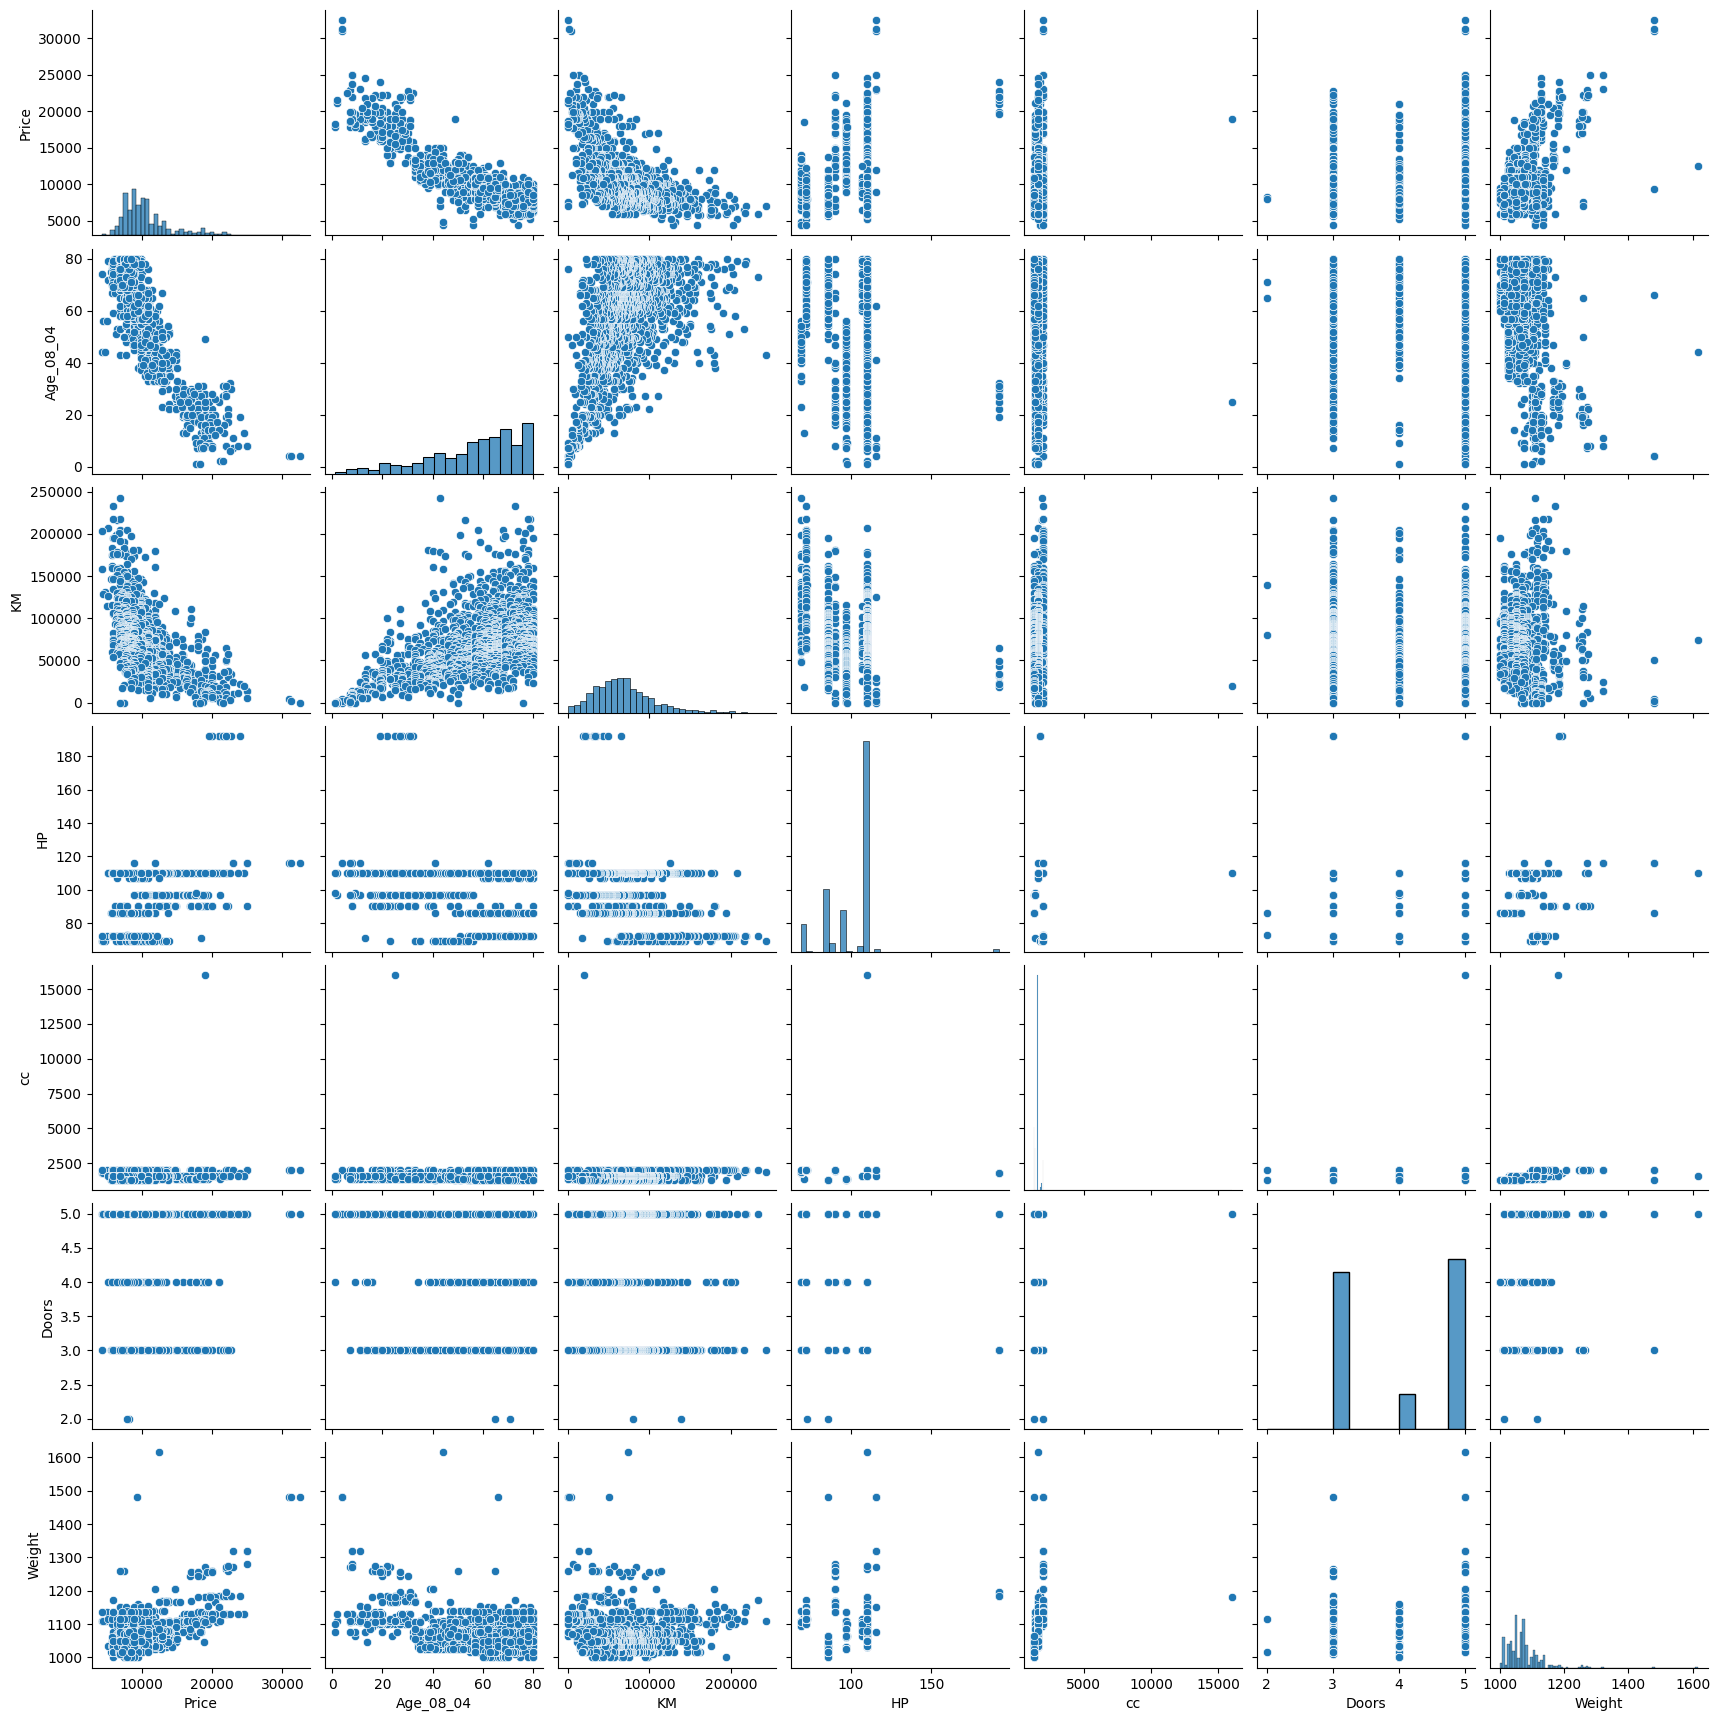

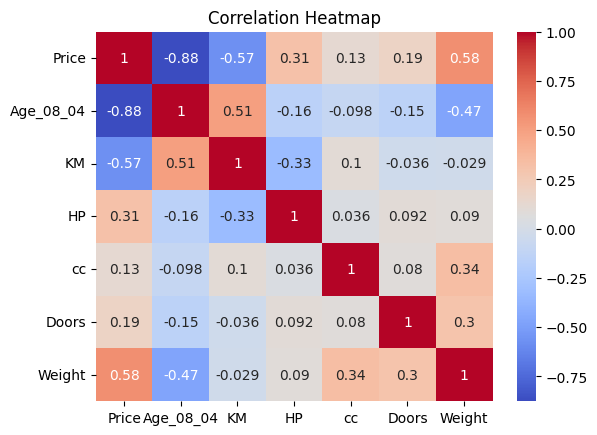

In [ ]:
#Data description
print(data.info())
print(data.describe())

# Missing values and unique values
print(data.isnull().sum().sum())
print(data.isnull().sum())
print(data.nunique())

#Pairplot for numeric columns
sns.pairplot(data[["Price","Age_08_04","KM","HP","cc","Doors","Weight"]],kind='scatter')
plt.show()
# Cylinder column has single unique value

# Correlation heatmap for numeric columns
sns.heatmap(data[["Price","Age_08_04","KM","HP","cc","Doors","Weight"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#One hot encoding for convrting categorical column into numeric
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

# Train-Test Split

In [ ]:
X=data.drop('Price',axis=1)
y=data['Price'] # target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1148, 11)
(288, 11)


# MLR models

In [ ]:
# Model 1: Linear Regression with all features
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

print("Model 1: Linear Regression with all features")
print("Intercept:", lr_all.intercept_)
print("Coefficients:", dict(zip(X_train.columns, lr_all.coef_)))

# Model 2: OLS Regression (detailed summary with statsmodels)
# Add constant term for intercept
X_train_ols = sm.add_constant(X_train)

# Convert all columns to float (important for statsmodels)
X_train_ols = X_train_ols.astype(float)

ols_model = sm.OLS(y_train, X_train_ols).fit()

print("Model 2: OLS Regression Summary (Statsmodels)")
print(ols_model.summary())

# Model 3: Feature Selection (based on high correlation features)

selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_fs = X_train[selected_features]
X_test_fs = X_test[selected_features]

lr_fs = LinearRegression()
lr_fs.fit(X_train_fs, y_train)

print("Model 3: Linear Regression with selected features")
print("Intercept:", lr_fs.intercept_)
print("Coefficients:", dict(zip(selected_features, lr_fs.coef_)))


Model 1: Linear Regression with all features
Intercept: -14255.385993565254
Coefficients: {'Age_08_04': np.float64(-120.83045817097117), 'KM': np.float64(-0.016231410612674253), 'HP': np.float64(14.039478769759068), 'Automatic': np.float64(148.83092691181997), 'cc': np.float64(-0.030372194607027406), 'Doors': np.float64(-60.31097437498872), 'Cylinders': np.float64(-1.6200374375330284e-12), 'Gears': np.float64(551.6007102659818), 'Weight': np.float64(25.884958313274495), 'Fuel_Type_Diesel': np.float64(-68.54875675828677), 'Fuel_Type_Petrol': np.float64(1370.80890981598)}
Model 2: OLS Regression Summary (Statsmodels)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Tue, 09 Sep 2025   Prob (F-statistic):  

# Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate model 1
y_pred1 = lr_all.predict(X_test)
print("Linear Regression with all features: Model1")
print("R2:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

# Evaluate model 2
y_pred2 = ols_model.predict(X_test)
print("Ordinary Least Squares method: Model2")
print("R2:", r2_score(y_test, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred2)))

# Evaluate model 3
y_pred3 = lr_fs.predict(X_test_fs)
print("Linear Regression with selected features: Model3")
print("R2:", r2_score(y_test, y_pred3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred3)))

Linear Regression with all features: Model1
R2: 0.8348888040611082
RMSE: 1484.2654153296514
Ordinary Least Squares method: Model2
R2: 0.8348888040611067
RMSE: 1484.2654153296585
Linear Regression with selected features: Model3
R2: 0.8506068681500583
RMSE: 1411.85020911323


# Ridge and Lasso Regression

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso R2 score:", r2_score(y_test, y_pred_lasso))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge R2 score:", r2_score(y_test, y_pred_ridge))

Lasso R2 score: 0.8349467801805
Ridge R2 score: 0.8351359377712336
